<h2 style = "text-align:center; color:yellow">Proyecto Final Programación</h2>
<h4 style = "text-align:center">Juan José Londoño David - Sergio Gallon</h4>
<p style = "text-align:center">En este proyecto desarrollaremos un modelo de predicción del clima, partiendo de la base de datos abierta del gobierno para sus estaciones metereologicas</p>
<p style = "text-align:center; color:gray">Universidad EIA 2023</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tkinter as tk
from ttkthemes import ThemedTk

In [2]:
import pandas as pd
datos = pd.read_csv('./data_files/parameters.csv')
datos.rename(columns={
    'Temperatura 10cm (°C)': 'T (degC)',
    'Fecha y Hora de Inicio (dd/MM/aaaa  HH:mm:ss)': 'hora',
    'Fecha y Hora de Finalización (dd/MM/aaaa  HH:mm:ss)': 'hora_final',
    "PM10 (ug/m3)\nCondición Estándar": 'pm10',
    "Dirección del viento (Grados)": 'wind_direction',
    "Velocidad del Viento (m/s)": "wind_speed",
    "Presión atmosférica (mm Hg)": "pressure_mm_hg",
    "Humedad Relativa 10m (%)": 'humedad'
},inplace=True)
datos = datos.drop(['hora_final', 'Radiación Solar Global (W/m2)', 'Precipitación (mm)'], axis = 1)
datos = datos.drop_duplicates()
datos

,hora,pm10,wind_speed,wind_direction,T (degC),pressure_mm_hg,humedad
0,01/01/2022 12:00:00 AM,17.025539,0.146154,97.266667,23.607692,756.130769,93.948718
1,01/01/2022 01:00:00 AM,14.893095,0.350000,224.278947,22.794737,755.611184,94.444737
2,01/01/2022 02:00:00 AM,11.785741,0.256410,179.684615,22.225641,755.292308,95.258974
3,01/01/2022 03:00:00 AM,16.259467,0.392308,206.848718,22.089744,755.300000,95.138462
4,01/01/2022 04:00:00 AM,18.612182,0.536842,270.278947,21.947368,755.484868,95.357895
...,...,...,...,...,...,...,...
718,01/31/2022 07:00:00 PM,27.458633,2.192105,308.036842,26.184210,757.318421,78.026316
719,01/31/2022 08:00:00 PM,18.178288,2.007895,314.247368,25.902632,757.951974,78.855263
720,01/31/2022 09:00:00 PM,20.717283,1.605128,317.794872,25.620513,758.376923,81.015385
721,01/31/2022 10:00:00 PM,22.872291,1.546154,313.256410,25.443590,758.351923,81.661539


In [3]:
datos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pm10,723.0,42.743138,21.082659,7.165748,26.475222,37.474389,55.057060,106.717664
wind_speed,723.0,1.000658,0.558236,0.015790,0.562821,0.926316,1.385526,2.828205
wind_direction,723.0,247.997925,77.480434,0.326316,204.191363,278.505128,311.258974,347.265789
T (degC),723.0,27.005457,3.459839,20.456410,24.255705,26.023077,30.321795,35.244737
pressure_mm_hg,723.0,757.052811,1.892008,734.871710,756.089891,757.190132,758.153023,760.428947
humedad,723.0,78.231284,12.854949,45.930769,66.234211,81.552632,89.521186,95.984615


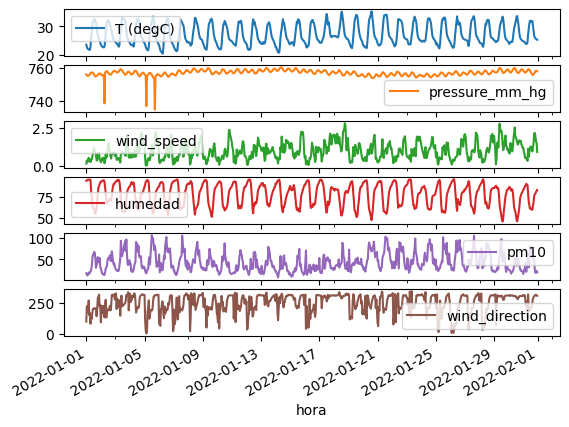

In [4]:
if 'hora' in datos.columns:
    date_time = pd.to_datetime(datos.pop('hora'), format='%m/%d/%Y %I:%M:%S %p')
date_time

##Graficar parametros
plot_cols = ['T (degC)', 'pressure_mm_hg', 'wind_speed', 'humedad', 'pm10', 'wind_direction']
plot_features = datos[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)



<h3 style = "text-align:center">Generamos Las Respectivas Gráficas De Comparación</h3>

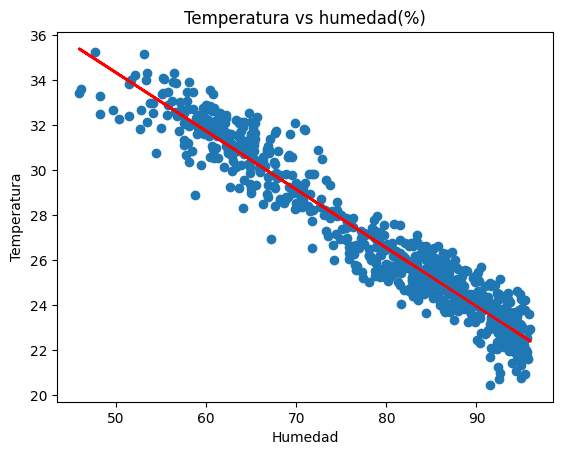

In [5]:
temperatura = datos['T (degC)']
humedad = datos['humedad']

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(humedad.values.reshape(-1, 1), temperatura)

# Predicción de temperatura
temperatura_predicha = modelo.predict(humedad.values.reshape(-1, 1))

# Graficar la dispersión de los datos y la recta de regresión
plt.scatter(humedad, temperatura)
plt.plot(humedad, temperatura_predicha, color='red', linewidth=2)
plt.title('Temperatura vs humedad(%)')
plt.xlabel('Humedad')
plt.ylabel('Temperatura')
plt.show()

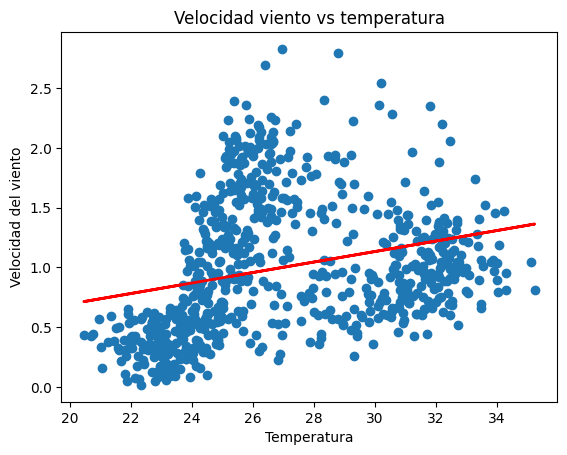

In [6]:
# Datos de entrenamiento
temperatura = datos['T (degC)']
wind_speed = datos['wind_speed']

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(temperatura.values.reshape(-1, 1), wind_speed)

# Predicción de velocidad del viento
wind_speed_predicha = modelo.predict(temperatura.values.reshape(-1, 1))

# Graficar la dispersión de los datos y la recta de regresión
plt.scatter(temperatura, wind_speed)
plt.plot(temperatura, wind_speed_predicha, color='red', linewidth=2)
plt.title('Velocidad viento vs temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Velocidad del viento')
plt.show()

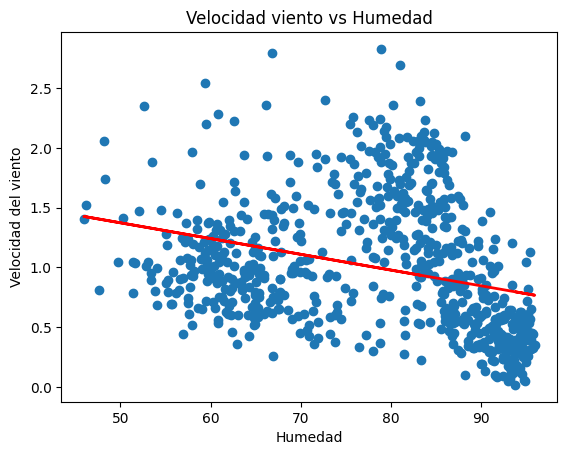

In [7]:
# Datos de entrenamiento
humedad = datos['humedad']
wind_speed = datos['wind_speed']

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(humedad.values.reshape(-1, 1), wind_speed)

# Predicción de velocidad del viento
wind_speed_predicha = modelo.predict(humedad.values.reshape(-1, 1))

# Graficar la dispersión de los datos y la recta de regresión
plt.scatter(humedad, wind_speed)
plt.plot(humedad, wind_speed_predicha, color='red', linewidth=2)
plt.title('Velocidad viento vs Humedad')
plt.xlabel('Humedad')
plt.ylabel('Velocidad del viento')
plt.show()

<h2 style = "text-align:center; color: yellow">Modelo #1</h2>
<h3 style = "text-align:center">Con regresión lineal múltiple en sklearn</h3>

In [11]:
import numpy as np

# Datos de entrenamiento
temperatura = datos['T (degC)']
wind_speed = datos['wind_direction']
humedad = datos['humedad']

# Variable objetivo (temperatura futura)
y = temperatura

# Crear una matriz de características combinando las variables independientes
X = np.column_stack((wind_speed, humedad))

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)
print()


In [12]:
def generarPrediccion():
    # Solicitar la entrada al usuario
    humedad_usuario = float(input("Ingresa la humedad: "))
    wind_speed_usuario = float(input("Ingresa la velocidad del viento: "))

    # Crear la matriz de características para la entrada del usuario
    X_usuario = np.array([[wind_speed_usuario, humedad_usuario]])

    # Predecir el valor de temperatura para la entrada del usuario
    temperatura_predicha = modelo.predict(X_usuario)

    # Imprimir el valor predicho
    print("Humedad: ", humedad_usuario)
    print("Velocidad Del Viento", wind_speed_usuario)
    print("La temperatura predicha es:", temperatura_predicha[0])

In [13]:
generarPrediccion()

Humedad:  0.4
Velocidad Del Viento 0.2
La temperatura predicha es: 47.53790733185728


<h3 style = "text-align:center">Creamos la respectiva interfaz</h3>


In [10]:
import tkinter as tk
from ttkthemes import ThemedTk
import numpy as np

# Crear la función para generar la predicción
def generarPrediccionVentana():
    # Obtener los valores ingresados por el usuario
    humedad_usuario = float(entrada_humedad.get())
    wind_speed_usuario = float(entrada_wind_speed.get())

    # Crear la matriz de características para la entrada del usuario
    X_usuario = np.array([[wind_speed_usuario, humedad_usuario]])

    # Predecir el valor de temperatura para la entrada del usuario
    temperatura_predicha = modelo.predict(X_usuario)

    # Actualizar el resultado en las etiquetas de salida
    etiqueta_resultado_humedad.config(text=f"Humedad: {humedad_usuario}", bg="white")
    etiqueta_resultado_wind_speed.config(text=f"Velocidad del viento: {wind_speed_usuario}", bg="white")
    etiqueta_resultado_temperatura.config(text=f"Temperatura predicha: {round(temperatura_predicha[0],2)}", bg="white")

# Crear la ventana principal con un tema específico
ventana = ThemedTk(theme="arc")

# Configurar la ventana principal
ventana.title("Predicción de Temperatura")
ventana.geometry("400x250")
ventana.resizable(False, False)

# Cambiar el color de fondo a azul
ventana.configure(bg="#56A0D3")

# Crear el marco principal
marco_principal = tk.Frame(ventana, padx=20, pady=20, bg="#56A0D3")
marco_principal.pack()

# Crear las etiquetas y los campos de entrada para los valores
etiqueta_humedad = tk.Label(marco_principal, text="Humedad:", bg="#56A0D3")
etiqueta_humedad.grid(row=0, column=0, sticky="w")
entrada_humedad = tk.Entry(marco_principal)
entrada_humedad.grid(row=0, column=1)

etiqueta_wind_speed = tk.Label(marco_principal, text="Velocidad del viento:", bg="#56A0D3")
etiqueta_wind_speed.grid(row=1, column=0, sticky="w")
entrada_wind_speed = tk.Entry(marco_principal)
entrada_wind_speed.grid(row=1, column=1)

# Crear el botón de predicción
boton_prediccion = tk.Button(marco_principal, text="Generar predicción", command=generarPrediccionVentana)
boton_prediccion.grid(row=2,columnspan=2, pady=10)

# Crear las etiquetas de salida para mostrar los resultados de la predicción
etiqueta_resultado_humedad = tk.Label(marco_principal, text="", bg="#56A0D3")
etiqueta_resultado_humedad.grid(row=3, columnspan=2)

etiqueta_resultado_wind_speed = tk.Label(marco_principal, text="", bg="#56A0D3")
etiqueta_resultado_wind_speed.grid(row=4, columnspan=2)

etiqueta_resultado_temperatura = tk.Label(marco_principal, text="", bg="#56A0D3")
etiqueta_resultado_temperatura.grid(row=5, columnspan=2)

# Ejecutar el bucle principal de la interfaz gráfica
ventana.mainloop()


<div style = "display:flex; align-items:center; justify-items:center">
    <img src = "./data_files/interfaz.png"></img>
</div>

<h2 style = "text-align:center; color: yellow">Modelo #2</h2>
<h3 style = "text-align:center">Desarrollamos modelo de red neuronal Tensorflow - Keras</h3>

In [14]:
import tensorflow as tf
import keras

2023-05-23 19:26:48.833968: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-23 19:26:50.295594: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-23 19:26:50.295664: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-05-23 19:26:50.295669: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

<h4>Dividir datos de entrenamiento en test y train con ayuda de sklearn.model_selection</h4>

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = datos[['wind_speed', 'humedad']]  # Input features
y = datos['T (degC)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (578, 2)
y_train shape: (578,)
X_test shape: (145, 2)
y_test shape: (145,)


<h4>Creo el modelo de keras y tensorflow usando loss (mean_squared_error) y optimizer adam </h4>

In [40]:
from tensorflow import keras
from tensorflow.keras import layers

# Definir los layers de entrada
input_layer = layers.Input(shape=(2,))  # Assumes 3 input features (temperature, humidity, wind speed)

# Añadir capas ocultas
hidden_layer1 = layers.Dense(64, activation='relu')(input_layer)
hidden_layer2 = layers.Dense(32, activation='relu')(hidden_layer1)

# Capa de salida
output_layer = layers.Dense(1)(hidden_layer2)  # Output layer for temperature prediction

# Genero el modelo
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compilar modelo
model.compile(loss='mean_squared_error', optimizer='adam')


<h4>Entreno el modelo</h4>

In [51]:

# Entrenar el modelo con sus respectivas epochs
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
15/15 [==============================] - 0s 6ms/step - loss: 55.9330 - val_loss: 58.1392
Epoch 2/20
 1/15 [=>............................] - ETA: 0s - loss: 63.9344

/home/juan/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


15/15 [==============================] - 0s 4ms/step - loss: 55.9159 - val_loss: 61.1282
Epoch 3/20
15/15 [==============================] - 0s 4ms/step - loss: 56.2115 - val_loss: 57.1250
Epoch 4/20
15/15 [==============================] - 0s 3ms/step - loss: 54.5356 - val_loss: 57.5259
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 54.2815 - val_loss: 56.0086
Epoch 6/20
15/15 [==============================] - 0s 3ms/step - loss: 53.5927 - val_loss: 59.0668
Epoch 7/20
15/15 [==============================] - 0s 3ms/step - loss: 55.2433 - val_loss: 55.4942
Epoch 8/20
15/15 [==============================] - 0s 3ms/step - loss: 53.9935 - val_loss: 54.2668
Epoch 9/20
15/15 [==============================] - 0s 3ms/step - loss: 52.6652 - val_loss: 53.8041
Epoch 10/20
15/15 [==============================] - 0s 3ms/step - loss: 51.9337 - val_loss: 54.0719
Epoch 11/20
15/15 [==============================] - 0s 3ms/step - loss: 51.8630 - val_loss: 53.9726
Epoch 12/

In [52]:

# Evaluar el modelo con los datos de prueba
loss = model.evaluate(X_test, y_test)

# mostrar la metrica de perdida
print("Loss:", loss)

# Realizar predicciones en los datos de test
predictions = model.predict(X_test)

# Calcular métricas (mean squared error, mean absolute error)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# imprimir las métricas de evaluación
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


5/5 [==============================] - 0s 2ms/step - loss: 46.8477
Loss: 46.847686767578125
5/5 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 46.84768844294911
Mean Absolute Error (MAE): 6.298473602824959


In [75]:
import numpy as np

# Create a single instance with the input features (humidity, wind speed)
new_instance = np.array([[2, 78]])  # wind_speed, temperatura

# Make predictions on the new instance
predictions = model.predict(new_instance)

# Print the predicted temperature
temperature_pred = predictions[0][0]

print(f"Temperatura predicha: {temperature_pred:.2f}")


1/1 [==============================] - 0s 16ms/step
Temperatura predicha: 29.68


<h3>Guardar Modelo De Tensorflow</h3>

In [76]:

model_path = './data_files/modelo.h5'
# Save the model
model.save(model_path)

